# Below is the presentation of the group-average ICA maps for each template ICs, together with the inter-individual STD maps and ICC maps calculated at each voxel

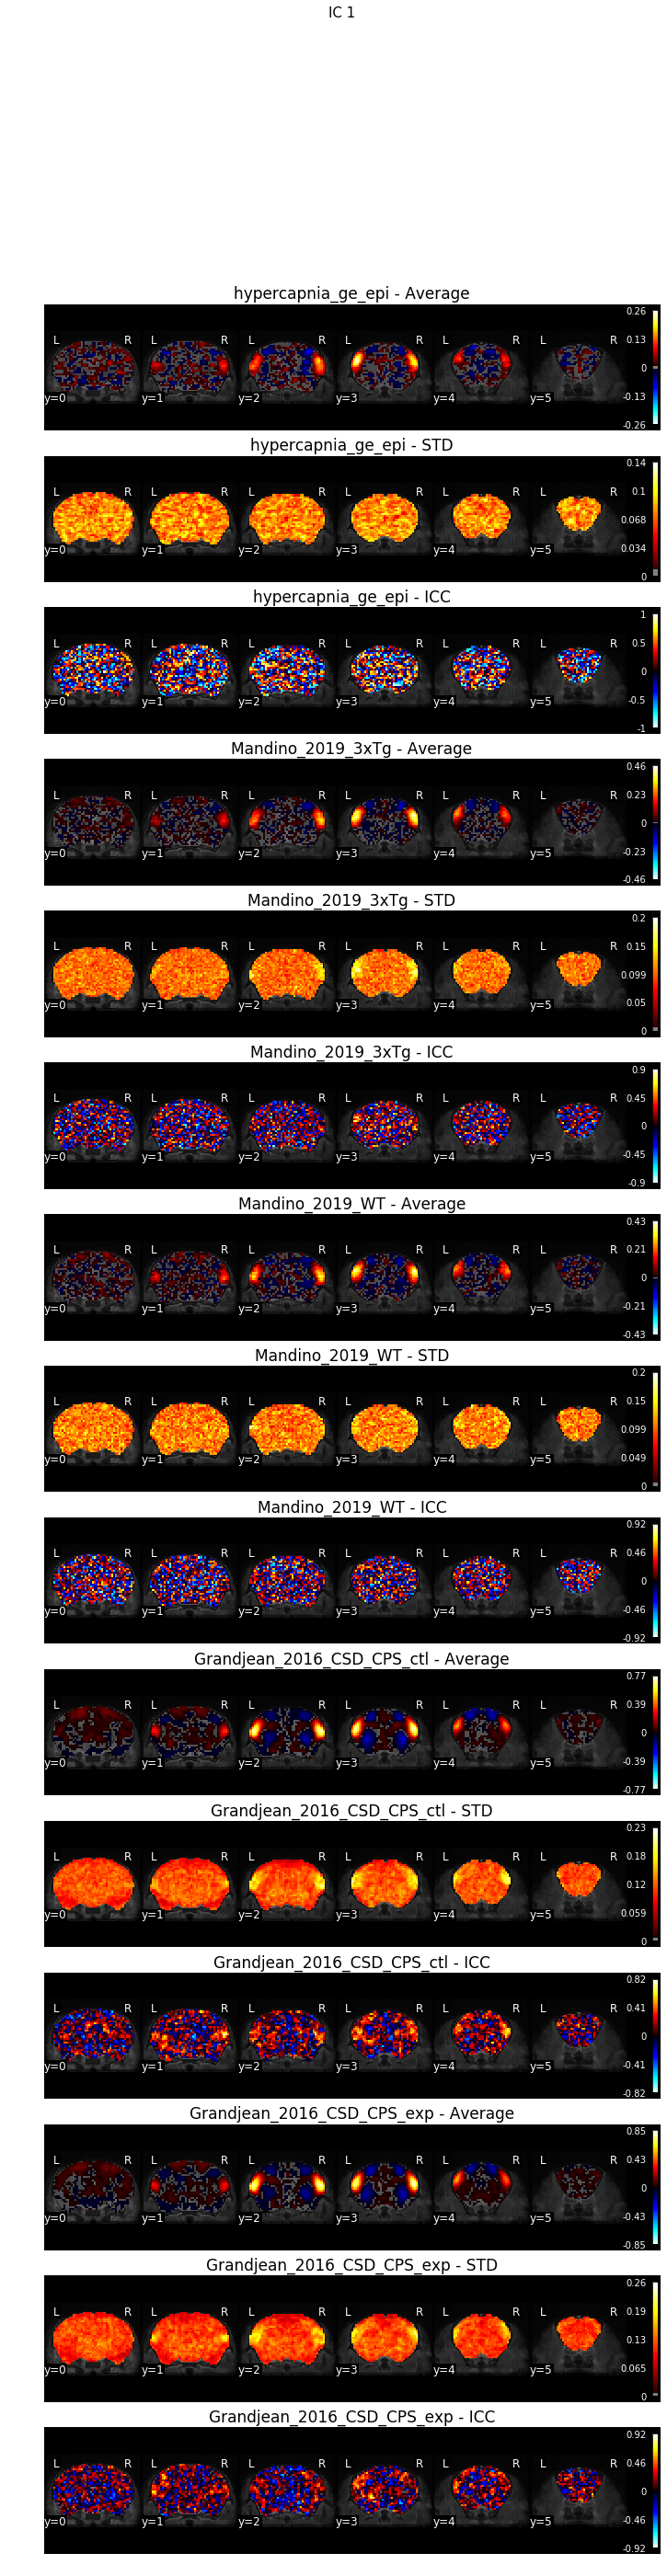

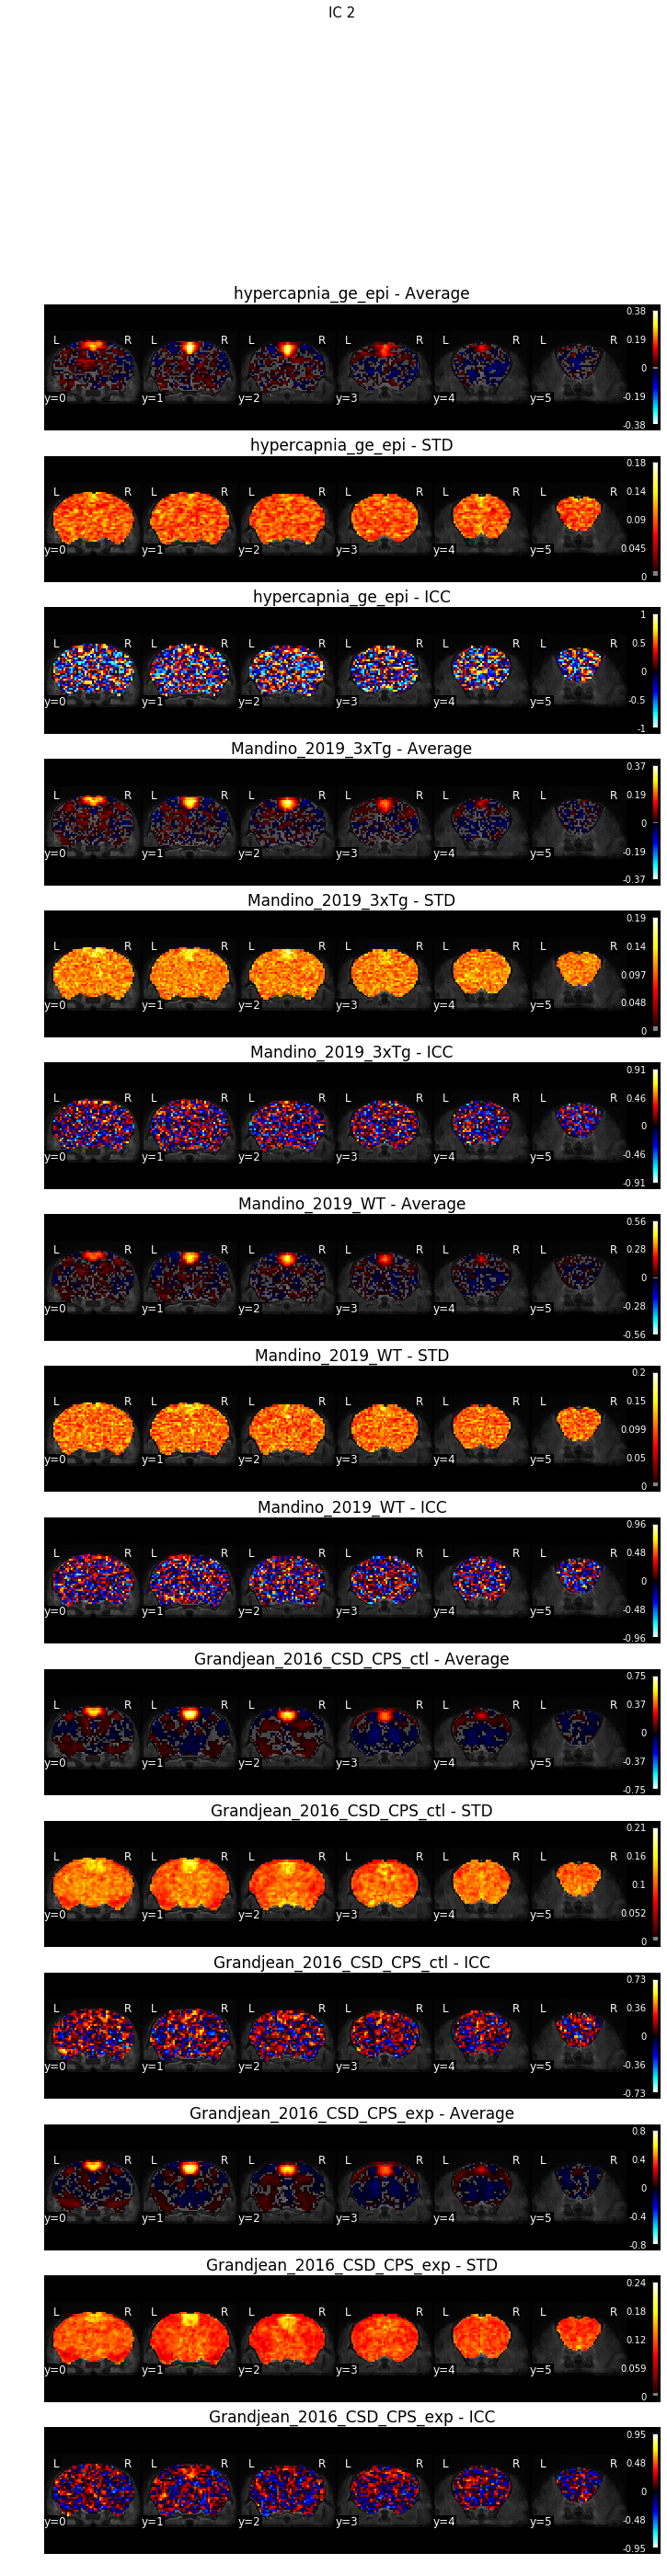

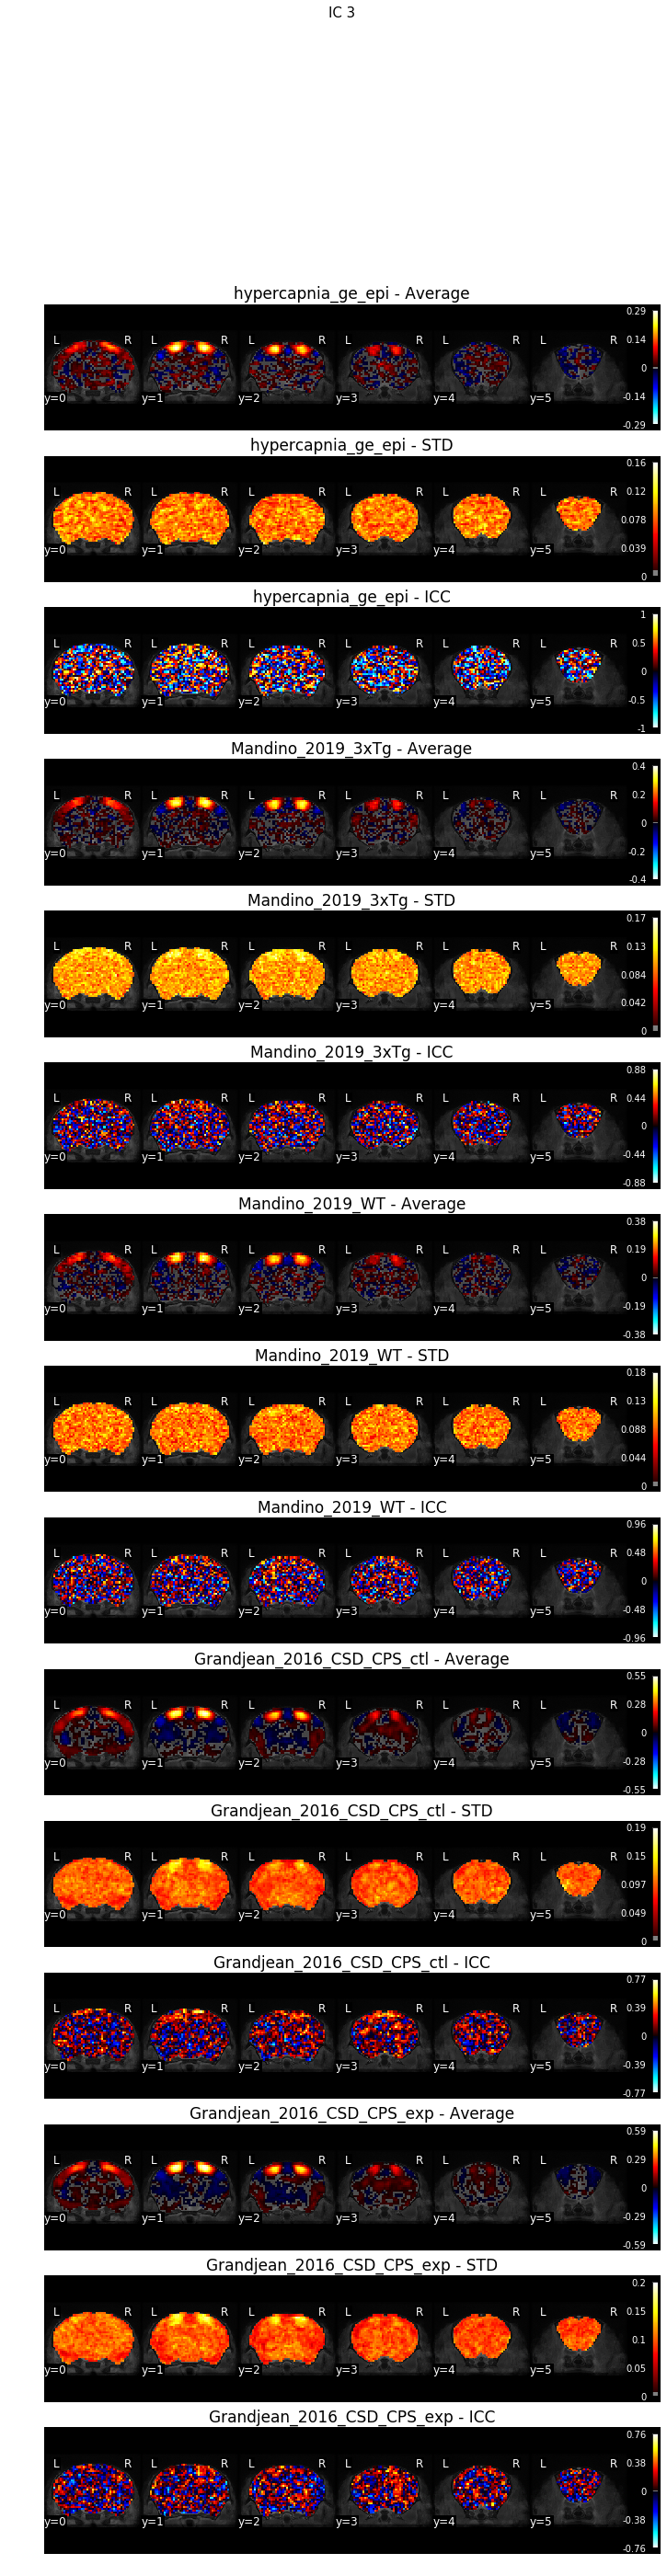

In [23]:
%matplotlib inline
from nilearn.plotting import plot_stat_map

mask_file=metadata['mask_file']

all_IC_array=np.asarray(nb.load(IC_file).dataobj)
all_IC_vectors=np.zeros([all_IC_array.shape[3],volume_indices.sum()])
for i in range(all_IC_array.shape[3]):
    all_IC_vectors[i,:]=(all_IC_array[:,:,:,i])[volume_indices]

groups=list(group_subs.keys())

shape=all_sub_FC[sub].shape

for j in range(len(IC_list[:3])):
    IC=IC_list[j]
    fig,axes = plt.subplots(nrows=len(groups)*3, ncols=1,figsize=(12,3*len(groups)*3))
    fig.suptitle('IC %s' % (str(IC+1)), fontsize=15)
    
    i=0
    for group in groups:
        group_concat=[]
        for sub in group_subs[group]:
            group_concat.append(all_sub_ICs[sub])
        group_mean=np.array(group_concat).mean(axis=0)
        group_std=np.array(group_concat).std(axis=0)
        icc_map=diagnosis['template_threshold: 1.0'][group]['icc_feature_map']
        icc_map=icc_map.reshape(shape)
        icc_map=np.nan_to_num(icc_map)

        ax=axes[i]
        i+=1
        plot_stat_map(analysis_functions.recover_3D(mask_file, group_mean[IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
        ax.set_title('%s - Average' % (group), fontsize=17)
        
        ax=axes[i]
        i+=1
        plot_stat_map(analysis_functions.recover_3D(mask_file, group_std[IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
        ax.set_title('%s - STD' % (group), fontsize=17)
        
        ax=axes[i]
        i+=1
        plot_stat_map(analysis_functions.recover_3D(mask_file, icc_map[j,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
        ax.set_title('%s - ICC' % (group), fontsize=17)

